In [ ]:
# Importing Panda and label-encoder
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Creating data-set of spam-ham messages
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


1. DATA CLEANING!!

In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
# Renaming columns and removing columns 3, 4, 5
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)
df = df.iloc[:, :2]
df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Encoding Label column into binary values
encoder = LabelEncoder()
encoder.fit_transform(df['label'])
df['label'] = encoder.fit_transform(df['label'])
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


2. EDA !!


In [ ]:
# Analyzing number of ham and spam messages in dataset
df['label'].value_counts()

,count
label,
0,4825
1,747


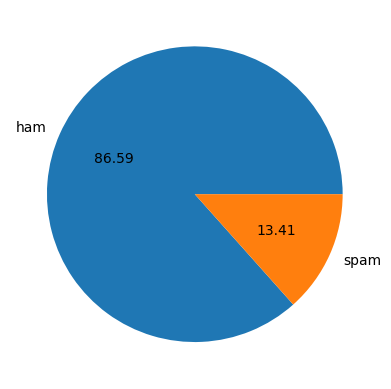

In [ ]:
# Analyzing ham and spam messages
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'], autopct = '%0.2f')
plt.show()

In [ ]:
import nltk

In [ ]:
# downloading requried things for nltk library
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# adding number of characters, words, sentences columns in dataset for further optimization
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df['num_characters'] = df['text'].apply(lambda x: len(x))
df.head()

,label,text,num_words,num_sentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [ ]:
# viewing summarize data of ham messages
df[['num_words','num_sentences','num_characters']][df['label'] == 0].describe()

,num_words,num_sentences,num_characters
count,4825.000000,4825.000000,4825.000000
mean,17.276269,1.837720,71.023627
std,13.988585,1.454388,58.016023
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,33.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,92.000000
max,220.000000,38.000000,910.000000


In [ ]:
# viewing summarize data of spam messages
df[['num_words','num_sentences','num_characters']][df['label'] == 1].describe()

,num_words,num_sentences,num_characters
count,747.000000,747.000000,747.000000
mean,27.891566,3.021419,138.866131
std,6.867007,1.537580,29.183082
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.500000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


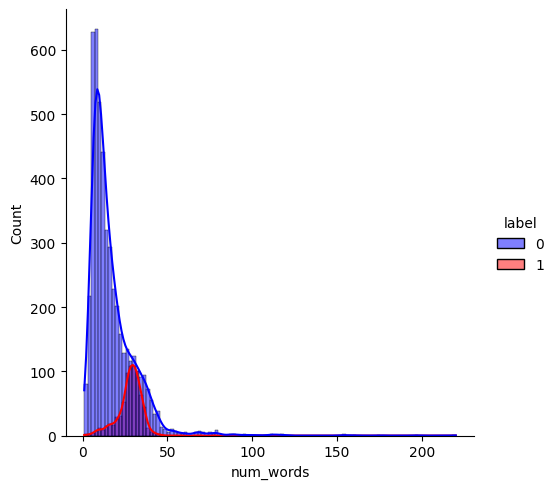

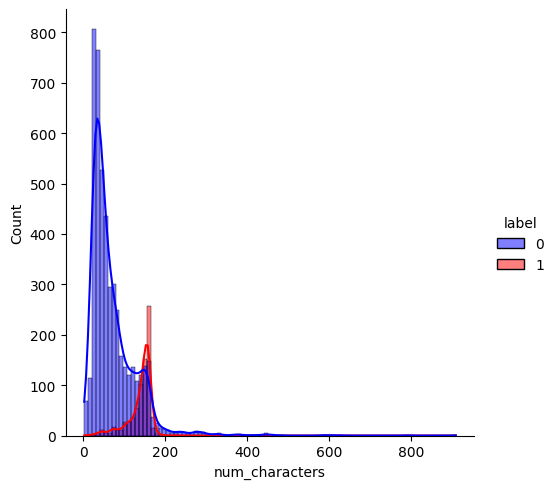

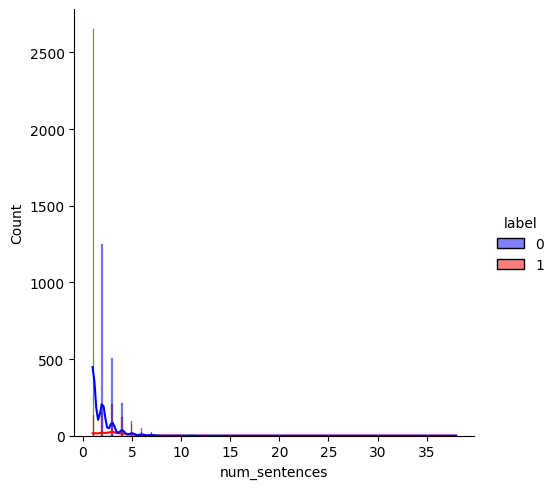

In [ ]:
# Visualize comaprision of characters, words and sentences in ham and spam messages
import seaborn as sns
sns.displot(data=df, x="num_words", hue="label", kde=True, palette=['blue', 'red'])
sns.displot(data=df, x="num_characters", hue="label", kde=True, palette=['blue', 'red'])
sns.displot(data=df, x="num_sentences", hue="label", kde=True, palette=['blue', 'red'])


<Axes: >

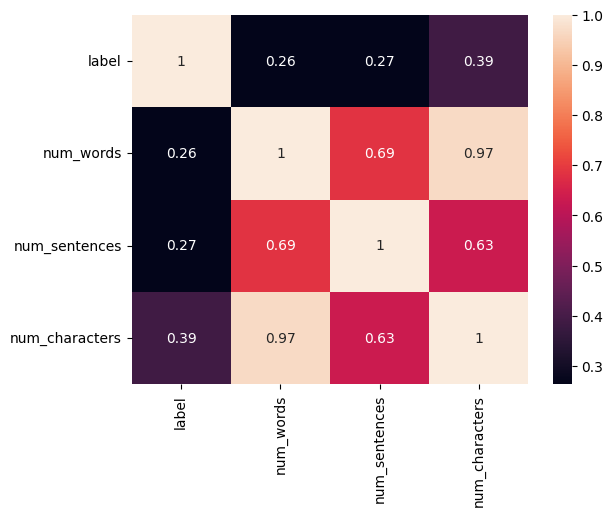

In [ ]:
sns.heatmap(df[['label','num_words','num_sentences','num_characters']].corr(), annot=True)


3.DATA PREPROCESSING!!


In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# # Download required NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Tokenization
    tokens = word_tokenize(text)

    # 3. Removing special characters and punctuation
    tokens = [re.sub(r'[^a-zA-Z0-9\s]', '', token) for token in tokens]

    # # 4. Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token]

    # # 5. Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)
df.head()

,label,text,num_words,num_sentences,num_characters,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah nt think goe usf live around though


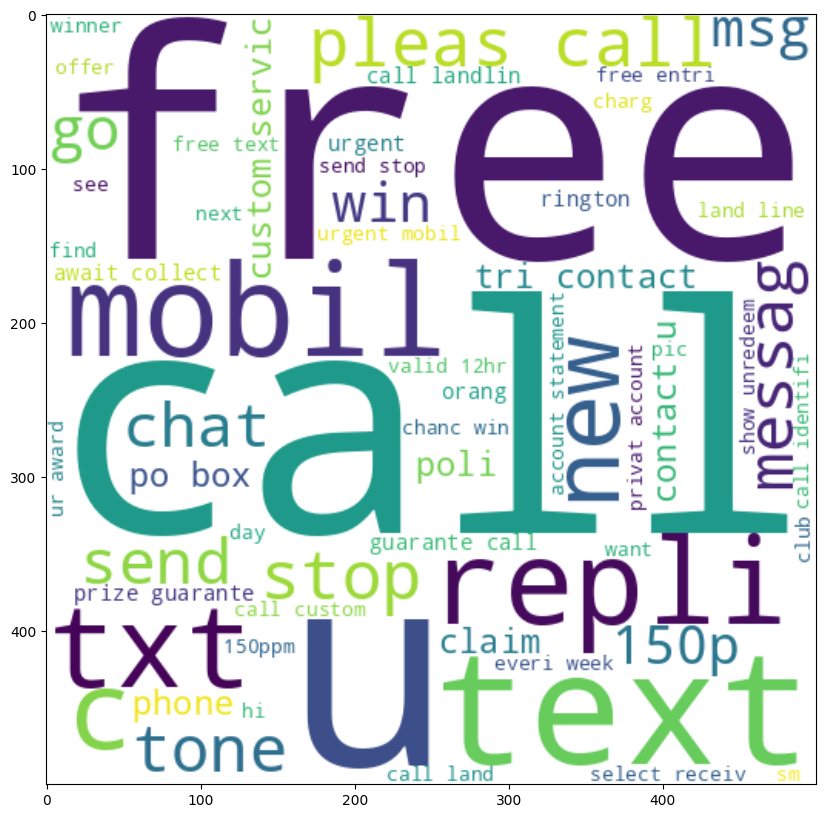

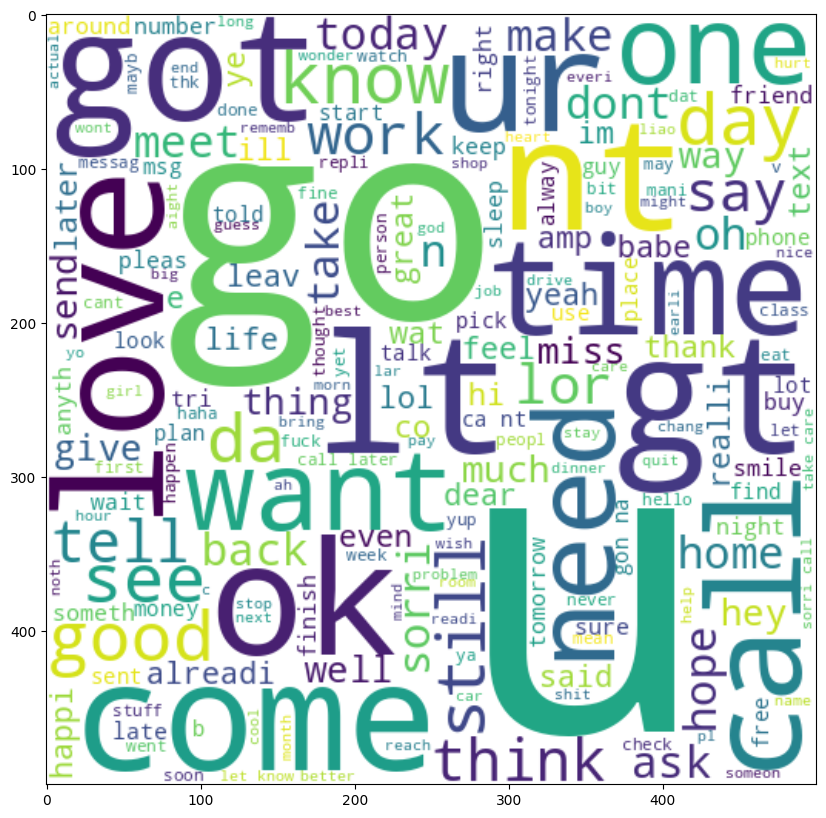

In [ ]:
# Creating wordcloud of reapting words that occur in ham and spam messages
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc.generate(df[df['label'] == 1]['preprocessed_text'].str.cat(sep=' '))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
wc.generate(df[df['label'] == 0]['preprocessed_text'].str.cat(sep=' '))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')


4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report, precision_score


In [ ]:
# converting preprocessed_text into vector encoding for model training and splitting data for train and test
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['preprocessed_text'])
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
# Training model using Multinomila Naive Bias
mnb.fit(X_train, y_train)
mnb.score(X_test, y_test)
y_predit = mnb.predict(X_test)
print(classification_report(y_test, y_predit))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       957
           1       1.00      0.68      0.81       158

    accuracy                           0.95      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.95      0.95      1115



In [ ]:
# Training model using Gaussian Naive Bias
gnb.fit(X_train.toarray(), y_train)
gnb.score(X_test.toarray(), y_test) # Convert X_test to a dense array using toarray()

0.8708520179372198

In [ ]:
y_predit1 = gnb.predict(X_test.toarray())
print(classification_report(y_test, y_predit1))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       957
           1       0.53      0.80      0.64       158

    accuracy                           0.87      1115
   macro avg       0.75      0.84      0.78      1115
weighted avg       0.90      0.87      0.88      1115



In [ ]:
# Training model using Bernoulli Naive Bias
bnb.fit(X_train, y_train)
bnb.score(X_test, y_test)
y_predit2 = bnb.predict(X_test)
print(classification_report(y_test, y_predit))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       957
           1       1.00      0.68      0.81       158

    accuracy                           0.95      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.95      0.95      1115



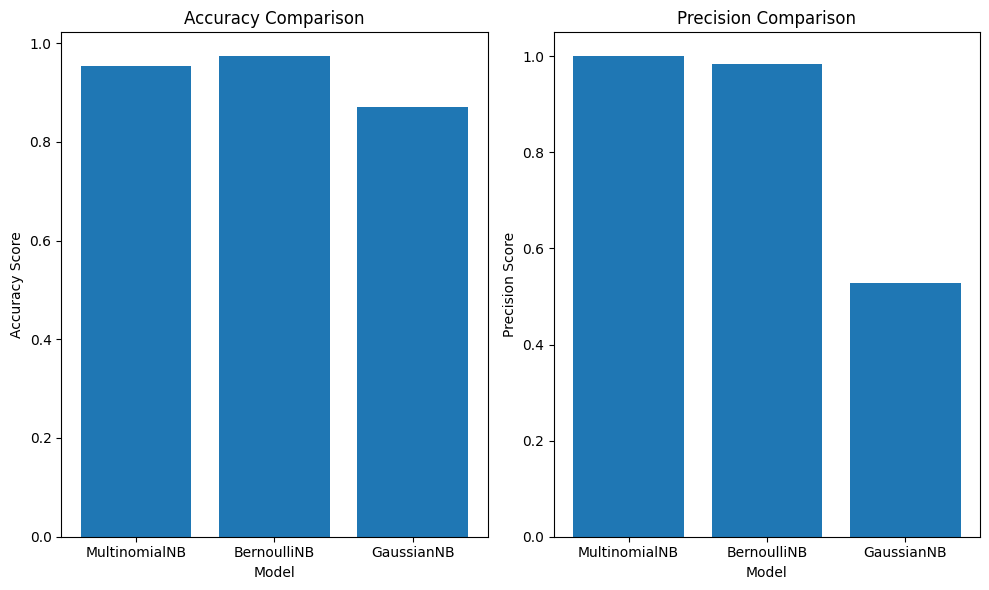

In [ ]:
# Comparing 3 models accuracy and precision
model_names = ['MultinomialNB', 'BernoulliNB', 'GaussianNB']
accuracy_scores = [mnb.score(X_test, y_test), bnb.score(X_test, y_test), gnb.score(X_test.toarray(), y_test)]
precision_scores = [precision_score(y_test, mnb.predict(X_test)), precision_score(y_test, bnb.predict(X_test)), precision_score(y_test, gnb.predict(X_test.toarray()))]

# Create a bar chart for accuracy scores
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, accuracy_scores)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison')

# Create a bar chart for precision scores
plt.subplot(1, 2, 2)
plt.bar(model_names, precision_scores)
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Precision Comparison')

plt.tight_layout()
plt.show()